In [69]:
import pandas as pd
from os import listdir
from os.path import isfile, join

# Read all results from txt files


aco_path = "./raw_files/ACO/"
aco_files = [f for f in listdir(aco_path) if isfile(join(aco_path, f))]

ga_path = "./raw_files/GA/"
ga_files = [f for f in listdir(ga_path) if isfile(join(ga_path, f))]

pso_path = "./raw_files/PSO/"
pso_files = [f for f in listdir(pso_path) if isfile(join(pso_path, f))]





# Ant Colony Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "E-factor"]
df_aco = pd.DataFrame(columns = column_names)

for file in aco_files:
    f_path = join(aco_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    evp = float(res['B'][5]) # evaporation factor

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Cost']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
                    
    df_aco = df_aco.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "E-factor": evp}, ignore_index=True)


    
    
# -------------------------------------------------------------------------------------
# Genetic Algorithm - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "N-pop", "PC"]
df_ga = pd.DataFrame(columns = column_names)

for file in ga_files:
    f_path = join(ga_path,file)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    pop = float(res['B'][5]) # population size
    pc = float(res['B'][6]) # population size


    sup = float(res['B'][7]) # minimum support
    pat = float(res['B'][9]) # patterns
    mit = int(res['B'][10]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Cost']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
        
    df_ga = df_ga.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "N-pop": pop, "PC": pc}, ignore_index=True)



# -------------------------------------------------------------------------------------
# Particle Swarm Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "N-particle", "Velocity", "C1", "C2"]
df_pso = pd.DataFrame(columns = column_names)

for file in pso_files:
    f_path = join(pso_path,file)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    vel = float(res['B'][5]) # velocity
    c1 = float(res['B'][6]) # personal coefficient
    c2 = float(res['B'][7]) # global coefficient
    npat = float(res['B'][8]) # particle count

    sup = float(res['B'][9]) # minimum support
    pat = float(res['B'][11]) # patterns
    mit = int(res['B'][12]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Position']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
        
    df_pso = df_pso.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "N-particle": npat, "Velocity": vel, "C1": c1, "C2": c2}, ignore_index=True)


    

In [70]:
df_aco1 = df_aco[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory', 'E-factor']]
df_aco1 = df_aco1.groupby(["Algorithm", "E-factor", "Data-set"]).describe(percentiles=[])
df_aco1

Pattern-count                             \
                                             count       mean       std   min   
Algorithm          E-factor Data-set                                            
 ACO-GRAANK (v2.0) 0.1      B & C              3.0  21.666667  1.527525  20.0   
                            Buoys              3.0  40.333333  5.131601  36.0   
                            C2K                3.0  33.333333  1.154701  32.0   
                            UCI                3.0   4.333333  2.516611   2.0   
                   0.3      B & C              3.0  18.000000  3.605551  14.0   
                            Buoys              3.0  38.666667  4.725816  35.0   
                            C2K                3.0  27.333333  3.785939  23.0   
                            UCI                3.0   5.000000  1.732051   4.0   
                   0.5      B & C              3.0  16.333333  2.886751  13.0   
                            Buoys              3.0  37.666667  5.131601  32.0   
                            C2K                3.0  22.000000  3.605551  18.0   
                            UCI                3.0   4.333333  0.577350   4.0   
                   0.9      B & C              3.0  13.666667  5.033223   9.0   
                            Buoys              3.0  28.000000  5.291503  24.0   
                            C2K                3.0  20.333333  4.509250  16.0   
                            UCI                3.0   3.333333  0.577350   3.0   

                                                 Run-time              \
                                       50%   max    count        mean   
Algorithm          E-factor Data-set                                    
 ACO-GRAANK (v2.0) 0.1      B & C     22.0  23.0      3.0    0.944000   
                            Buoys     39.0  46.0      3.0   39.540000   
                            C2K       34.0  34.0      3.0   42.550000   
                            UCI        4.0   7.0      3.0  167.900000   
                   0.3      B & C     19.0  21.0      3.0    0.684667   
                            Buoys     37.0  44.0      3.0   33.550000   
                            C2K       29.0  30.0      3.0   33.486667   
                            UCI        4.0   7.0      3.0  110.133333   
                   0.5      B & C     18.0  18.0      3.0    0.372000   
                            Buoys     39.0  42.0      3.0   29.943333   
                            C2K       23.0  25.0      3.0   29.890000   
                            UCI        4.0   5.0      3.0   71.780000   
                   0.9      B & C     13.0  19.0      3.0    0.211667   
                            Buoys     26.0  34.0      3.0   23.586667   
                            C2K       20.0  25.0      3.0   21.826667   
                            UCI        3.0   4.0      3.0   60.590000   

                                                                            \
                                            std      min      50%      max   
Algorithm          E-factor Data-set                                         
 ACO-GRAANK (v2.0) 0.1      B & C      0.056956    0.894    0.932    1.006   
                            Buoys      2.798982   36.360   40.630   41.630   
                            C2K        3.963269   39.400   41.250   47.000   
                            UCI       32.012029  134.800  170.200  198.700   
                   0.3      B & C      0.216019    0.467    0.688    0.899   
                            Buoys      4.994887   27.880   35.470   37.300   
                            C2K        2.400174   30.770   34.370   35.320   
                            UCI        5.442732  106.000  108.100  116.300   
                   0.5      B & C      0.052115    0.338    0.346    0.432   
                            Buoys      2.462445   27.720   29.520   32.590   
                            C2K        2.623033   28.180   28.580   32.910   
                 

In [71]:
df_ga1 = df_ga[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory', 'N-pop', 'PC']]
df_ga1 = df_ga1.groupby(["Algorithm", "N-pop", "PC", "Data-set"]).describe(percentiles=[])
df_ga1

Pattern-count                           \
                                             count      mean       std  min   
Algorithm         N-pop PC  Data-set                                          
 GA-GRAANK (v1.0) 5.0   0.1 B & C              3.0  1.000000  0.000000  1.0   
                            Buoys              3.0  1.000000  0.000000  1.0   
                            C2K                3.0  1.000000  0.000000  1.0   
                            UCI                3.0  1.000000  0.000000  1.0   
                        0.3 B & C              3.0  2.333333  0.577350  2.0   
                            Buoys              3.0  2.333333  0.577350  2.0   
                            C2K                3.0  1.666667  0.577350  1.0   
                            UCI                3.0  1.000000  0.000000  1.0   
                        0.5 B & C              3.0  4.000000  3.000000  1.0   
                            Buoys              3.0  2.333333  0.577350  2.0   
                            C2K                3.0  2.000000  1.000000  1.0   
                            UCI                3.0  1.000000  0.000000  1.0   
                        0.9 B & C              3.0  2.666667  0.577350  2.0   
                            Buoys              3.0  2.333333  1.154701  1.0   
                            C2K                3.0  1.666667  0.577350  1.0   
                            UCI                3.0  1.333333  0.577350  1.0   

                                               Run-time               \
                                      50%  max    count         mean   
Algorithm         N-pop PC  Data-set                                   
 GA-GRAANK (v1.0) 5.0   0.1 B & C     1.0  1.0      3.0     0.195000   
                            Buoys     1.0  1.0      3.0   130.666667   
                            C2K       1.0  1.0      3.0   175.133333   
                            UCI       1.0  1.0      3.0   376.333333   
                        0.3 B & C     2.0  3.0      3.0     0.479000   
                            Buoys     2.0  3.0      3.0   337.566667   
                            C2K       2.0  2.0      3.0   468.133333   
                            UCI       1.0  1.0      3.0   994.433333   
                        0.5 B & C     4.0  7.0      3.0     0.503333   
                            Buoys     2.0  3.0      3.0   299.633333   
                            C2K       2.0  3.0      3.0   460.533333   
                            UCI       1.0  1.0      3.0   960.433333   
                        0.9 B & C     3.0  3.0      3.0     0.769000   
                            Buoys     3.0  3.0      3.0   555.633333   
                            C2K       2.0  2.0      3.0   804.000000   
                            UCI       1.0  2.0      3.0  1940.000000   

                                                                      \
                                             std       min       50%   
Algorithm         N-pop PC  Data-set                                   
 GA-GRAANK (v1.0) 5.0   0.1 B & C       0.011533     0.186     0.191   
                            Buoys      32.509435   101.300   125.100   
                            C2K         8.075477   168.200   173.200   
                            UCI       220.069315   221.800   278.900   
                        0.3 B & C       0.035595     0.438     0.497   
                            Buoys      35.043449   306.400   330.800   
                            C2K        19.456190   451.900   462.800   
                            UCI       273.358854   790.300   888.000   
                        0.5 B & C       0.011015     0.496     0.498   
                            Buoys      30.111515   279.100   285.600   
                            C2K        61.926516   402.600   453.200   
                            UCI       236.911256   722.200   963.100   
                        0.9 B & C       0.053675     0.713     0.774   
              

In [72]:
df_pso1 = df_pso[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory', 'N-particle', 'C1', 'C2']]
df_pso1 = df_pso1.groupby(["Algorithm", "N-particle", "C1", "C2", "Data-set"]).describe(percentiles=[])
df_pso1

Pattern-count            \
                                                       count      mean   
Algorithm          N-particle C1  C2  Data-set                           
 PSO-GRAANK (v1.0) 5.0        0.5 0.1 B & C              3.0  1.000000   
                                      Buoys              3.0  1.000000   
                                      C2K                3.0  1.666667   
                                      UCI                3.0  1.000000   
                                  0.3 B & C              3.0  1.666667   
                                      Buoys              3.0  1.333333   
                                      C2K                3.0  1.000000   
                                      UCI                3.0  1.000000   
                                  0.5 B & C              3.0  2.000000   
                                      Buoys              3.0  1.333333   
                                      C2K                3.0  1.333333   
                                      UCI                3.0  1.000000   
                                  0.9 B & C              3.0  1.333333   
                                      Buoys              3.0  1.333333   
                                      C2K                3.0  1.333333   
                                      UCI                3.0  1.000000   

                                                                        \
                                                    std  min  50%  max   
Algorithm          N-particle C1  C2  Data-set                           
 PSO-GRAANK (v1.0) 5.0        0.5 0.1 B & C     0.00000  1.0  1.0  1.0   
                                      Buoys     0.00000  1.0  1.0  1.0   
                                      C2K       0.57735  1.0  2.0  2.0   
                                      UCI       0.00000  1.0  1.0  1.0   
                                  0.3 B & C     0.57735  1.0  2.0  2.0   
                                      Buoys     0.57735  1.0  1.0  2.0   
                                      C2K       0.00000  1.0  1.0  1.0   
                                      UCI       0.00000  1.0  1.0  1.0   
                                  0.5 B & C     0.00000  2.0  2.0  2.0   
                                      Buoys     0.57735  1.0  1.0  2.0   
                                      C2K       0.57735  1.0  1.0  2.0   
                                      UCI       0.00000  1.0  1.0  1.0   
                                  0.9 B & C     0.57735  1.0  1.0  2.0   
                                      Buoys     0.57735  1.0  1.0  2.0   
                                      C2K       0.57735  1.0  1.0  2.0   
                                      UCI       0.00000  1.0  1.0  1.0   

                                               Run-time               \
                                                  count         mean   
Algorithm          N-particle C1  C2  Data-set                         
 PSO-GRAANK (v1.0) 5.0        0.5 0.1 B & C         3.0     0.745000   
                                      Buoys         3.0   465.700000   
                                      C2K           3.0   685.866667   
                                      UCI           3.0  1544.700000   
                                  0.3 B & C         3.0     0.493667   
                                      Buoys         3.0   498.300000   
                                      C2K           3.0   793.333333   
                                      UCI           3.0  2228.000000   
                                  0.5 B & C         3.0     0.490000   
                                      Buoys         3.0   336.900000   
                                      C2K           3.0   763.366667   
                                      UCI           3.0  2205.333333   
                                  0.9 B & C         3.0     0.466667   
                                      Buoys         3.0   645.433333   
         

In [73]:
# Combining the results
frames = [df_aco, df_ga, df_pso]
df_res = pd.concat(frames)

# Only include these columns
df_res2 = df_res[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory']]  #, 'E-factor', 'N-pop', 'N-particle', 'C1', 'C2']]

df = df_res2.groupby(['Algorithm', 'Data-set'])#.describe(percentiles=[])
df2 = pd.concat([df.min(), df.mean(), df.max(), df.std()], keys=['min', 'mean', 'max', 'std'], axis=1)
# df2.filter(like="Run-time")
df2.columns = df2.columns.swaplevel(0, 1)
df2.sort_index(axis=1, level=0, inplace=True, ascending=False)
df2.round(3)


Run-time                               \
                                 std      min      mean       max   
Algorithm          Data-set                                         
 ACO-GRAANK (v2.0) B & C       0.312    0.137     0.553     1.006   
                   Buoys       6.995   20.380    31.655    41.630   
                   C2K         8.153   20.200    31.938    47.000   
                   UCI        46.311   56.450   102.601   198.700   
 GA-GRAANK (v1.0)  B & C       0.214    0.186     0.487     0.820   
                   Buoys     167.960  101.300   330.875   645.400   
                   C2K       235.375  168.200   476.950   850.800   
                   UCI       623.864  221.800  1067.800  2199.000   
 PSO-GRAANK (v1.0) B & C       0.166    0.294     0.549     0.928   
                   Buoys     195.548  157.200   486.583   871.500   
                   C2K       130.423  513.900   754.458   980.800   
                   UCI       783.593  617.100  2084.092  3325.000   

                            Pattern-count                      Memory         \
                                      std   min    mean   max     std    min   
Algorithm          Data-set                                                    
 ACO-GRAANK (v2.0) B & C            4.252   9.0  17.417  23.0   9.639   99.2   
                   Buoys            6.631  24.0  36.167  46.0  15.149  154.0   
                   C2K              6.092  16.0  25.750  34.0   1.303  199.0   
                   UCI              1.485   2.0   4.250   7.0  13.226  112.0   
 GA-GRAANK (v1.0)  B & C            1.732   1.0   2.500   7.0   4.922   86.4   
                   Buoys            0.853   1.0   2.000   3.0   4.569  105.0   
                   C2K              0.669   1.0   1.583   3.0   2.712  117.0   
                   UCI              0.289   1.0   1.083   2.0   3.612   96.6   
 PSO-GRAANK (v1.0) B & C            0.522   1.0   1.500   2.0   0.840   83.3   
                   Buoys            0.452   1.0   1.250   2.0   0.778  102.0   
                   C2K              0.492   1.0   1.333   2.0   1.193  112.0   
                   UCI              0.000   1.0   1.000   1.0   1.638   92.6   

                                             
                                mean    max  
Algorithm          Data-set                  
 ACO-GRAANK (v2.0) B & C     118.183  131.0  
                   Buoys     182.750  203.0  
                   C2K       200.333  202.0  
                   UCI       128.250  153.0  
 GA-GRAANK (v1.0)  B & C      94.292  101.0  
                   Buoys     113.833  119.0  
                   C2K       123.583  127.0  
                   UCI       103.200  108.0  
 PSO-GRAANK (v1.0) B & C      84.542   85.9  
                   Buoys     102.667  104.0  
                   C2K       113.833  116.0  
                   UCI        95.750   97.3

In [74]:
#df_gra1 = df_graank[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory']]
#df_gra1 = df_gra1.groupby(["Algorithm", "Data-set"]).describe(percentiles=[])
#df_gra1

#df_aco1 = df_aco[['Data-set', 'Algorithm', 'Pattern-count', 'Max-iteration', 'Iterations', 'E-factor']]

#df = df_aco1.groupby(["Algorithm", "E-factor", "Data-set"]).describe()
#df2 = pd.concat([df.min(), df.mean(), df.max(), df.std()], keys=['min', 'mean', 'max', 'std'], axis=1)
#df2.filter(like="Run-time")
#df2.columns = df2.columns.swaplevel(0, 1)
#df2.sort_index(axis=1, level=0, inplace=True, ascending=False)
#df.round(3)

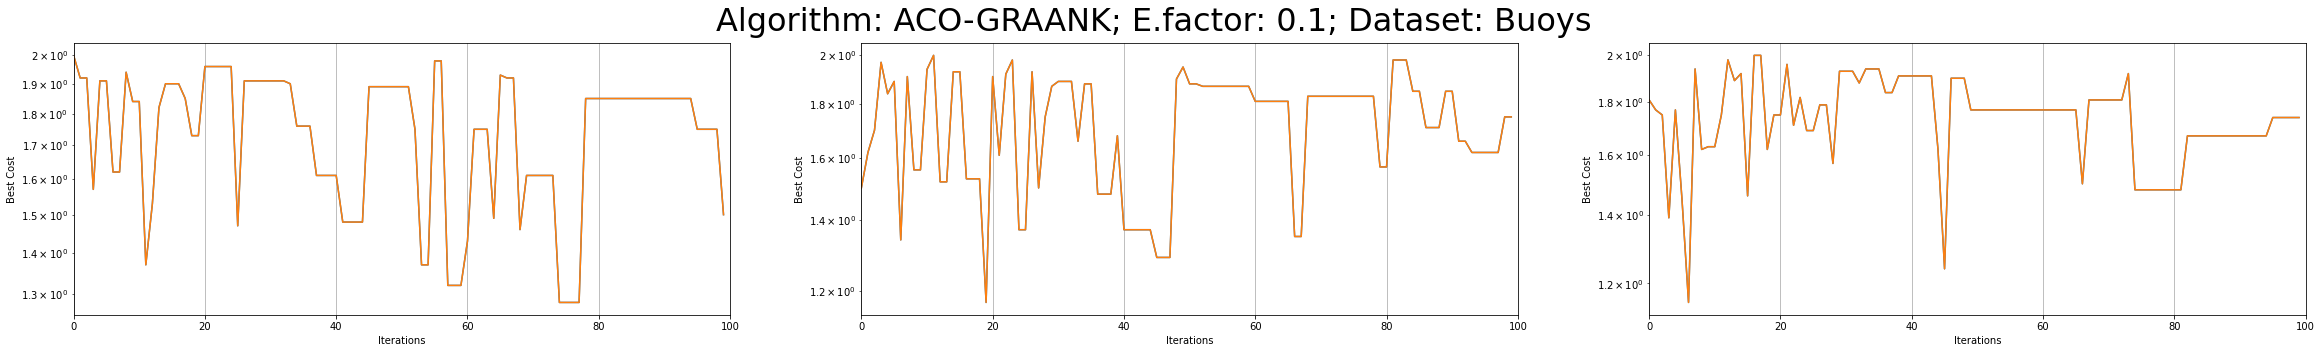

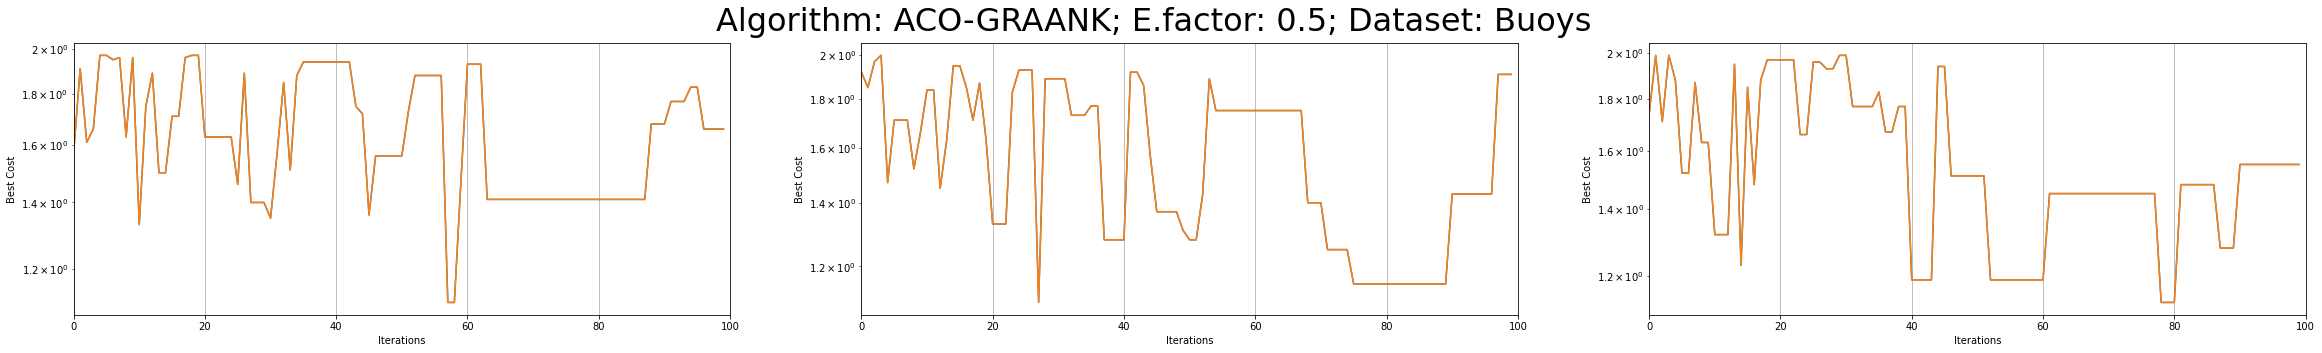

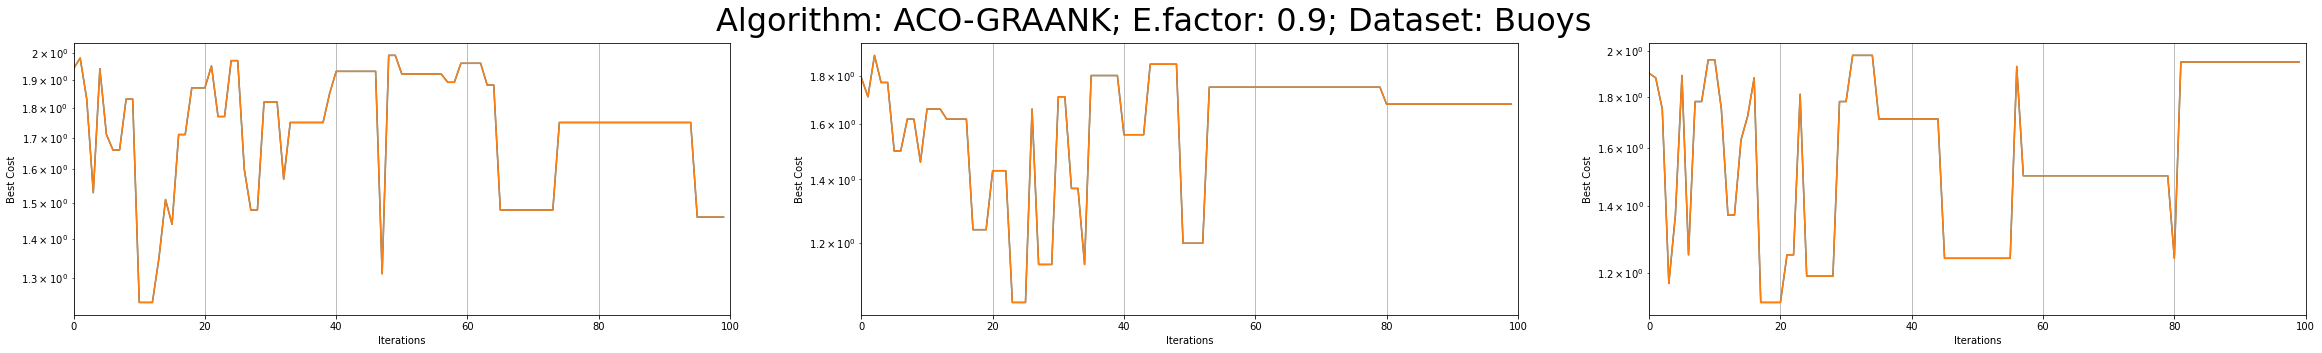

In [79]:
import matplotlib.pyplot as plt

data_sets = ['B & C', 'Buoys', 'C2K', 'UCI']
data_sets = ['Buoys']

for ds in data_sets:
    df1 = df_aco.loc[df_aco['Data-set'] == ds]
    
    e_fs = [0.1, 0.3, 0.5, 0.9]
    e_fs = [0.1, 0.5, 0.9]  # TO BE REMOVED
    
    for e in e_fs:
        df2 = df1.loc[df1['E-factor'] == e]
    
        fig = plt.figure(figsize=(40,5))
        #fig = plt.figure()
        #axes = fig.subplots(nrows=1, ncols=4)
        i = 1
        for index,row in df2.iterrows():
            # Results
            plt.subplot(1, 3, i)
            plt.plot(row['Iterations'])
            plt.semilogy(row['Iterations'])
            plt.xlim(0, row['Max-iteration'])
            plt.xlabel('Iterations')
            plt.ylabel('Best Cost')
            #plt.title('ACO, Dataset: ' + ds)
            plt.grid(True)
            i += 1

        fig.suptitle('Algorithm: ACO-GRAANK; E.factor: ' + str(e) + '; Dataset: ' + ds, fontsize=32)
        plt.show()

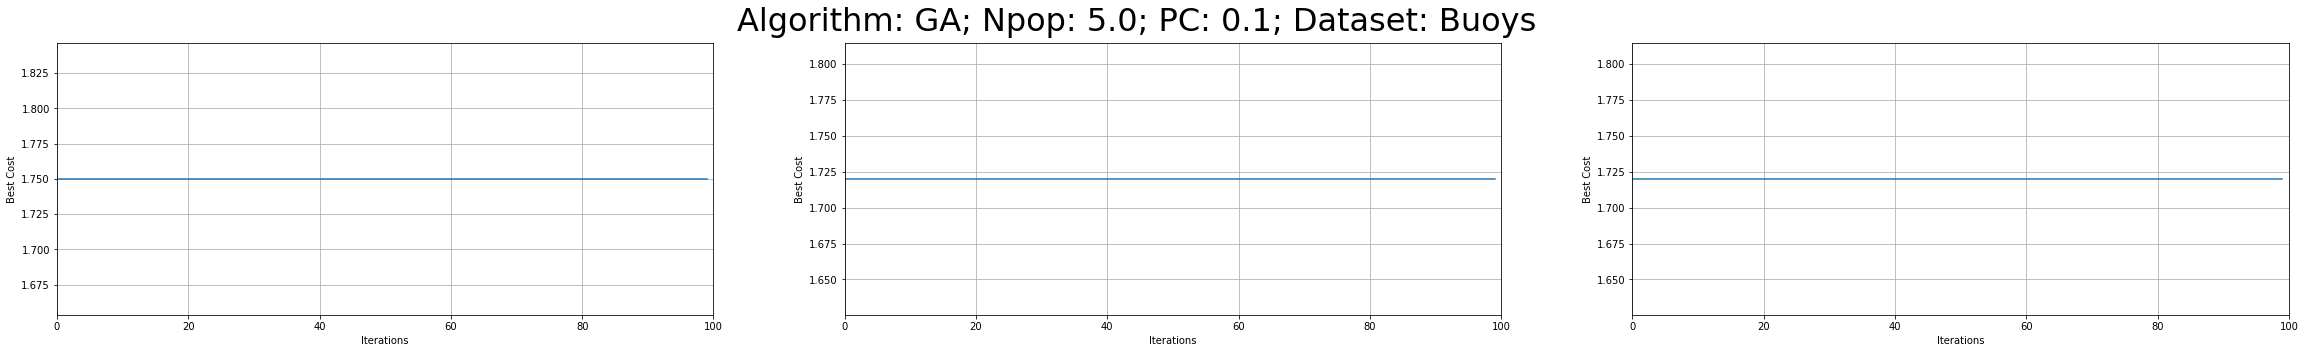

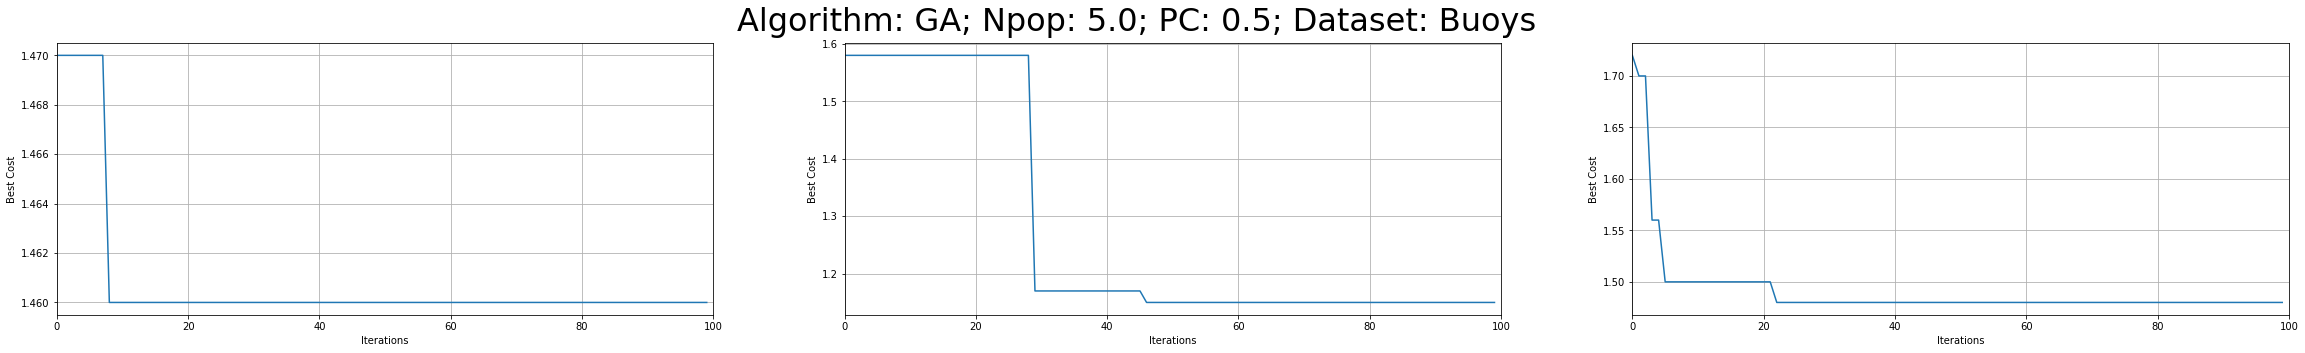

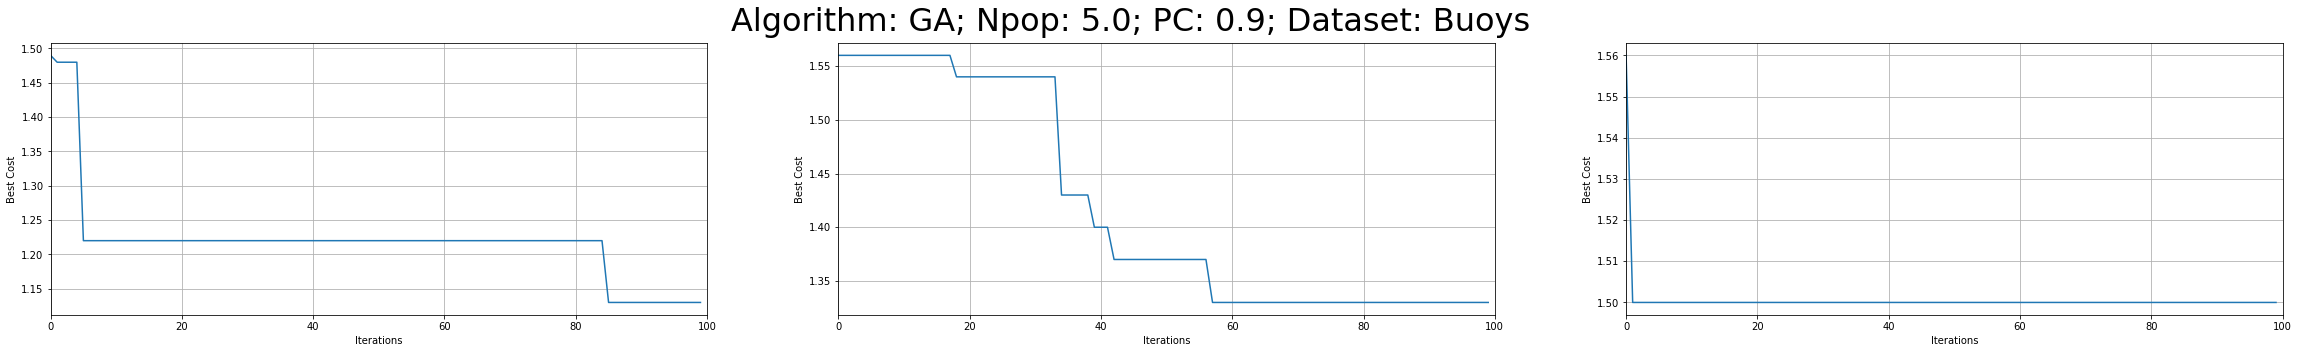

In [84]:
for ds in data_sets:
    df1 = df_ga.loc[df_ga['Data-set'] == ds]
    pcs = [0.1, 0.3, 0.5, 0.9]
    pcs = [0.1, 0.5, 0.9]  # TO BE REMOVED
    
    for pc in pcs:
        df2 = df1.loc[df1['PC'] == pc]
    
        fig = plt.figure(figsize=(40,5))
        #fig = plt.figure()
        #axes = fig.subplots(nrows=1, ncols=4)
        i = 1
        for index,row in df2.iterrows():
            # Results
            plt.subplot(1, 3, i)
            plt.plot(row['Iterations'])
            plt.semilogy(row['Iterations'])
            plt.xlim(0, row['Max-iteration'])
            plt.xlabel('Iterations')
            plt.ylabel('Best Cost')
            #plt.title('ACO, Dataset: ' + ds)
            plt.grid(True)
            i += 1

        fig.suptitle('Algorithm: GA; Npop: ' + str(row['N-pop']) + '; PC: ' + str(pc) + '; Dataset: ' + ds, fontsize=32)
        plt.show()

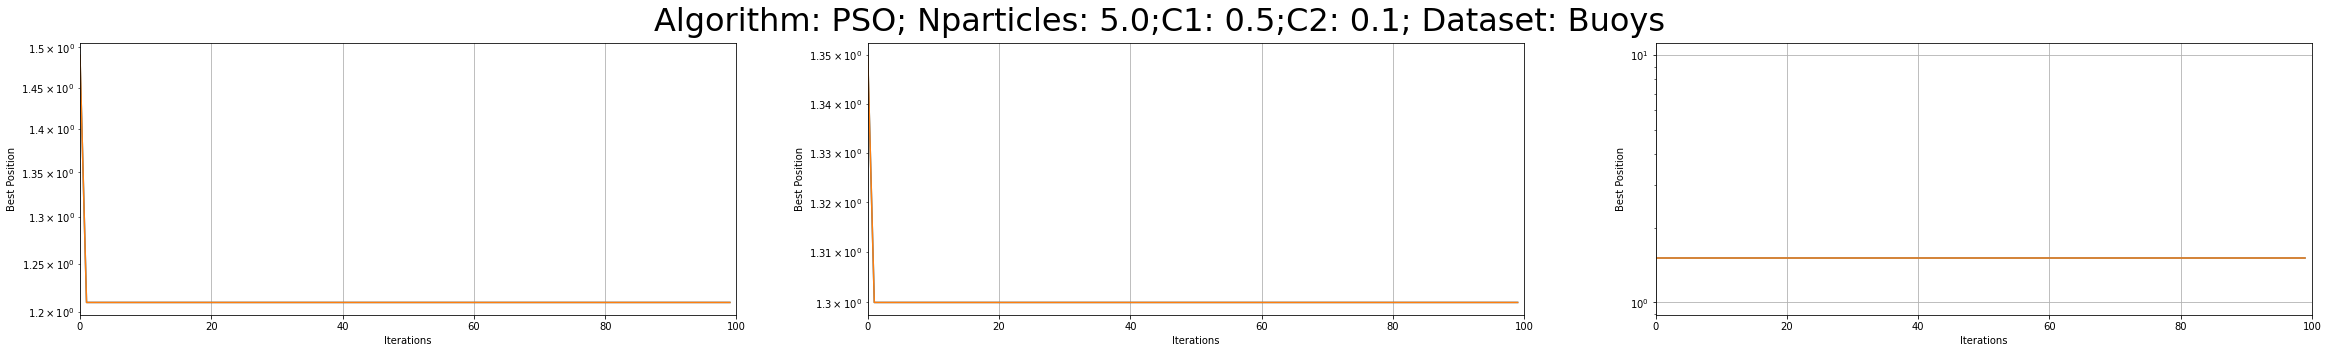

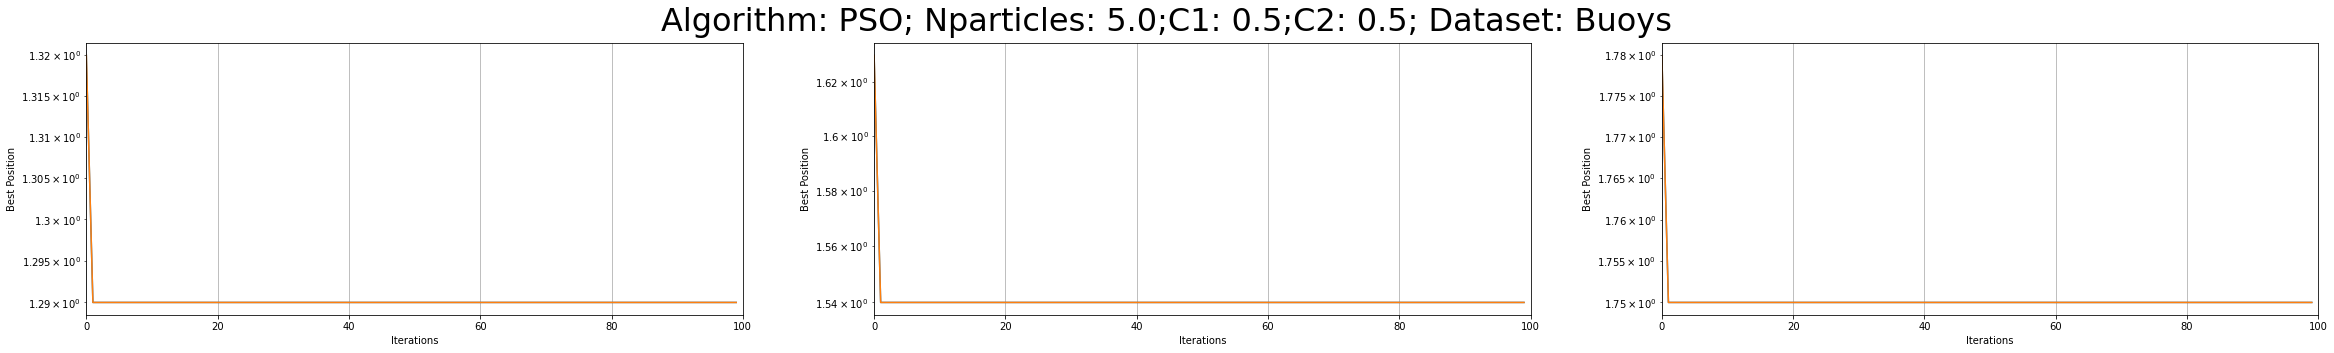

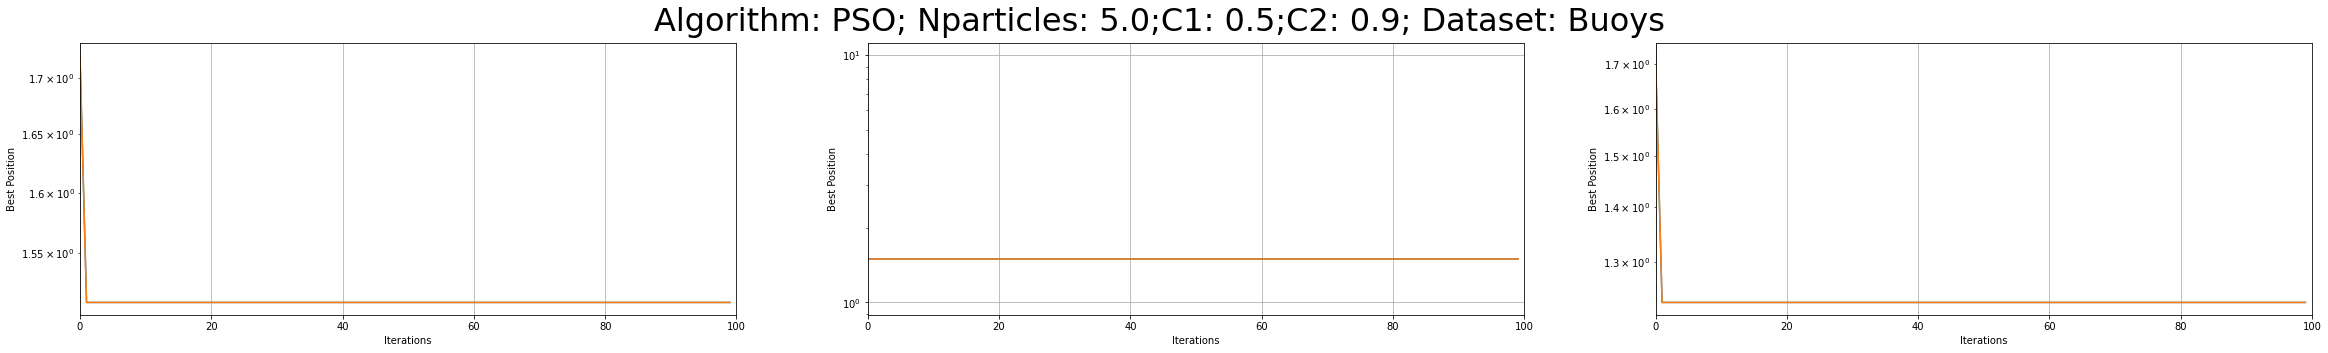

In [83]:
for ds in data_sets:
    df1 = df_pso.loc[df_pso['Data-set'] == ds]
    
    c2s = [0.1, 0.3, 0.5, 0.9]
    c2s = [0.1, 0.5, 0.9]  # TO BE REMOVED
    
    for c2 in c2s:
        df2 = df1.loc[df1['C2'] == c2]
    
        fig = plt.figure(figsize=(40,5))
        #fig = plt.figure()
        #axes = fig.subplots(nrows=1, ncols=4)
        i = 1
        for index,row in df2.iterrows():
            # Results
            plt.subplot(1, 3, i)
            plt.plot(row['Iterations'])
            plt.semilogy(row['Iterations'])
            plt.xlim(0, row['Max-iteration'])
            plt.xlabel('Iterations')
            plt.ylabel('Best Position')
            #plt.title('ACO, Dataset: ' + ds)
            plt.grid(True)
            i += 1

        fig.suptitle('Algorithm: PSO; Nparticles: ' + str(row['N-particle']) + ';C1: ' + str(row['C1']) + ';C2: ' + str(row['C2']) + '; Dataset: ' + ds, fontsize=32)
        plt.show()

In [89]:
# Comparing Swarm vs Classical Algorithms

allpath = "./raw_files/Classic/"
allfiles = [f for f in listdir(allpath) if isfile(join(allpath, f))]

column_names = ['Data-set', 'Objects', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory', 'E-factor', 'N-pop', 'N-particle', 'C1', 'C2']
df_all = pd.DataFrame(columns = column_names)


for file in allfiles:
    f_path = join(allpath, file)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
    
    if alg == ' ACO-GRAANK (v2.0)':
        alg = ' ACO'
        evp = float(res['B'][5]) # evaporation factor
        sup = float(res['B'][6]) # minimum support
        pat = float(res['B'][8]) # patterns
        
        df_all = df_all.append({"Data-set": col, "Objects": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "E-factor": evp}, ignore_index=True)
    elif alg == ' GA-GRAANK (v1.0)':
        alg = ' GA'
        pop = float(res['B'][5]) # population size
        pc = float(res['B'][6]) # population size
        sup = float(res['B'][7]) # minimum support
        pat = float(res['B'][9]) # patterns  
        
        df_all = df_all.append({"Data-set": col, "Objects": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "N-pop": pop, "PC": pc}, ignore_index=True)
    elif alg == ' PSO-GRAANK (v1.0)':
        alg = ' PSO'
        vel = float(res['B'][5]) # velocity
        c1 = float(res['B'][6]) # personal coefficient
        c2 = float(res['B'][7]) # global coefficient
        npat = float(res['B'][8]) # particle count
        sup = float(res['B'][9]) # minimum support
        pat = float(res['B'][11]) # patterns
        
        df_all = df_all.append({"Data-set": col, "Objects": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "N-particle": npat, "Velocity": vel, "C1": c1, "C2": c2}, ignore_index=True)
    else:
        sup = float(res['B'][5]) # minimum support
        pat = float(res['B'][7]) # patterns

        df_all = df_all.append({"Data-set": col, "Objects": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat}, ignore_index=True)

df_all

,Data-set,Objects,Algorithm,Pattern-count,Run-time,Memory,E-factor,N-pop,N-particle,C1,C2,Support,PC,Velocity
0,C2K,3943,ACO,10.0,21.880,199.0,0.5,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1,Buoys,15402,GA,1.0,150.100,104.0,NaN,5.0,NaN,NaN,NaN,0.6,0.5,NaN
2,C2K,3943,GA,2.0,18.990,103.0,NaN,5.0,NaN,NaN,NaN,0.7,0.5,NaN
3,B & C,116,ACO-LCM (1.0),25.0,0.813,458.0,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN
4,Buoys,15402,ACO,17.0,125.500,160.0,0.5,NaN,NaN,NaN,NaN,0.6,NaN,NaN
5,Buoys,15402,ACO,6.0,127.500,161.0,0.5,NaN,NaN,NaN,NaN,0.8,NaN,NaN
6,B & C,116,GA,1.0,0.031,80.5,NaN,5.0,NaN,NaN,NaN,0.6,0.5,NaN
7,Buoys,15402,ACO,2.0,155.800,158.0,0.5,NaN,NaN,NaN,NaN,0.9,NaN,NaN
8,C2K,3943,ACO,3.0,22.600,201.0,0.5,NaN,NaN,NaN,NaN,0.7,NaN,NaN
9,Buoys,15402,GA,1.0,91.050,99.8,NaN,5.0,NaN,NaN,NaN,0.9,0.5,NaN


In [90]:
pd.options.display.max_rows = 700
pd.options.display.max_columns = 40

# Only include these columns
df_all2 = df_all[['Data-set', 'Support', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory']]  #, 'E-factor', 'N-pop', 'N-particle', 'C1', 'C2']]


df = df_all2.groupby(['Data-set', 'Support', 'Algorithm']).describe(percentiles=[])
df.round(3)

Pattern-count                          \
                                          count     mean     std    min   
Data-set Support Algorithm                                                
B & C    0.5      ACO                       3.0   14.000   2.000   12.0   
                  ACO-LCM (1.0)             3.0   14.333   7.638    6.0   
                  GA                        3.0    1.333   0.577    1.0   
                  GRAANK                    3.0   58.000   0.000   58.0   
                  LCM-GRAD (1.0)            3.0   19.000   0.000   19.0   
                  PSO                       3.0    2.000   1.000    1.0   
         0.6      ACO                       3.0    4.333   2.082    2.0   
                  ACO-LCM (1.0)             3.0   10.000   5.292    4.0   
                  GA                        3.0    1.000   0.000    1.0   
                  GRAANK                    3.0   12.000   0.000   12.0   
                  LCM-GRAD (1.0)            3.0   19.000   0.000   19.0   
                  PSO                       3.0    1.333   0.577    1.0   
         0.7      ACO                       3.0    1.667   0.577    1.0   
                  ACO-LCM (1.0)             3.0   14.667   6.506    8.0   
                  GA                        3.0    1.000   0.000    1.0   
                  GRAANK                    3.0    4.000   0.000    4.0   
                  LCM-GRAD (1.0)            3.0   19.000   0.000   19.0   
                  PSO                       3.0    1.000   0.000    1.0   
         0.8      ACO                       3.0    0.667   0.577    0.0   
                  ACO-LCM (1.0)             3.0   13.333  11.060    3.0   
                  GA                        3.0    1.000   0.000    1.0   
                  GRAANK                    3.0    2.000   0.000    2.0   
                  LCM-GRAD (1.0)            3.0   18.000   0.000   18.0   
                  PSO                       1.0    1.000     NaN    1.0   
         0.9      ACO                       3.0    0.667   0.577    0.0   
                  ACO-LCM (1.0)             3.0   16.000  10.440    4.0   
                  GA                        3.0    1.000   0.000    1.0   
                  GRAANK                    3.0    2.000   0.000    2.0   
                  LCM-GRAD (1.0)            3.0   17.000   0.000   17.0   
Buoys    0.5      ACO                       3.0   28.333   6.658   24.0   
                  GA                        3.0    1.333   0.577    1.0   
                  PSO                       3.0    1.667   0.577    1.0   
         0.6      ACO                       3.0   18.000   2.646   16.0   
                  GA                        3.0    1.000   0.000    1.0   
                  PSO                       3.0    1.667   0.577    1.0   
         0.7      ACO                       3.0    9.333   2.517    7.0   
                  GA                        3.0    1.000   0.000    1.0   
                  GRAANK                    3.0   40.000   0.000   40.0   
                  PSO                       3.0    1.667   0.577    1.0   
         0.8      ACO                       3.0    6.000   2.000    4.0   
                  GA                        3.0    1.000   0.000    1.0   
                  GRAANK                    3.0   26.000   0.000   26.0   
                  PSO                       3.0    1.667   0.577    1.0   
         0.9      ACO                       3.0    1.667   0.577    1.0   
                  GA                        3.0    1.333   0.577    1.0   
                  GRAANK                    3.0    2.000   0.000    2.0   
                  PSO                       1.0    1.000     NaN    1.0   
C2K      0.5      ACO                       3.0   21.667   8.737   12.0   
                  GA                        3.0    1.333   0.577    1.0   
                  GRAANK                    3.0  604.000   0.000  604.0   
                  PSO                       3.0    1.333   

In [87]:
# Only include these columns
df_all2 = df_all[['Data-set', 'Support', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory']]  #, 'E-factor', 'N-pop', 'N-particle', 'C1', 'C2']]


df = df_all2.groupby(['Data-set', 'Support', 'Algorithm'])#.describe(percentiles=[])
df2 = pd.concat([df.min(), df.mean(), df.max(), df.std()], keys=['min', 'mean', 'max', 'std'], axis=1)
#df2.filter(like="Run-time")
df2.columns = df2.columns.swaplevel(0, 1)
df2.sort_index(axis=1, level=0, inplace=True, ascending=False)
df2.round(3)

Run-time                             \
                                       std      min     mean      max   
Data-set Support Algorithm                                              
B & C    0.5      ACO-LCM (1.0)      0.051    0.491    0.546    0.591   
                  GRAANK             0.006    1.212    1.219    1.223   
                  LCM-GRAD (1.0)     0.081   15.720   15.807   15.880   
         0.6      ACO                0.080    0.055    0.143    0.212   
                  ACO-LCM (1.0)      0.047    0.530    0.584    0.613   
...                                    ...      ...      ...      ...   
UCI      0.8      PSO               81.324  213.600  301.700  373.900   
         0.9      ACO               73.155  230.400  279.867  363.900   
                  GA                 9.498  227.700  234.200  245.100   
                  GRAANK             2.909  221.100  223.867  226.900   
                  PSO                5.798  355.100  359.200  363.300   

                                  Pattern-count                      Memory  \
                                            std   min    mean   max     std   
Data-set Support Algorithm                                                    
B & C    0.5      ACO-LCM (1.0)           7.638   6.0  14.333  21.0  21.455   
                  GRAANK                  0.000  58.0  58.000  58.0   0.462   
                  LCM-GRAD (1.0)          0.000  19.0  19.000  19.0   0.000   
         0.6      ACO                     2.082   2.0   4.333   6.0   8.327   
                  ACO-LCM (1.0)           5.292   4.0  10.000  14.0  19.925   
...                                         ...   ...     ...   ...     ...   
UCI      0.8      PSO                     0.000   1.0   1.000   1.0   0.896   
         0.9      ACO                     0.000   1.0   1.000   1.0   6.807   
                  GA                      0.000   1.0   1.000   1.0   0.153   
                  GRAANK                  0.000   2.0   2.000   2.0   0.058   
                  PSO                     0.000   1.0   1.000   1.0   0.141   

                                                             
                                      min      mean     max  
Data-set Support Algorithm                                   
B & C    0.5      ACO-LCM (1.0)     373.0   397.667   412.0  
                  GRAANK             98.6    99.133    99.4  
                  LCM-GRAD (1.0)   1044.0  1044.000  1044.0  
         0.6      ACO                93.0   102.333   109.0  
                  ACO-LCM (1.0)     365.0   388.000   400.0  
...                                   ...       ...     ...  
UCI      0.8      PSO                86.6    87.633    88.2  
         0.9      ACO               104.0   109.333   117.0  
                  GA                 95.7    95.833    96.0  
                  GRAANK             57.8    57.867    57.9  
                  PSO                87.6    87.700    87.8  

[72 rows x 12 columns]